In [4]:
# Library 
import chess
from chess import polyglot as poly
import chess.engine
import chess.svg
import time
from IPython.display import SVG, display

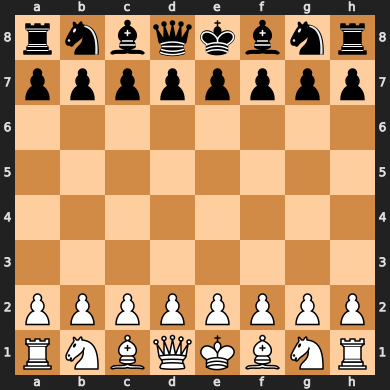

In [5]:
# Board
demo = chess.Board()
demo

In [6]:
import time

In [7]:
print(demo)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


In [8]:
MAX = 9999
MIN = -9999

In [9]:
# Value of piece position
pawntable = [
    0, 0, 0, 0, 0, 0, 0, 0,
    5, 10, 10, -20, -20, 10, 10, 5,
    5, -5, -10, 0, 0, -10, -5, 5,
    0, 5, 10, 20, 20, 10, 5, 0,
    5, 5, 10, 25, 25, 10, 5, 5,
    10, 10, 20, 30, 30, 20, 10, 10,
    50, 50, 50, 50, 50, 50, 50, 50,
    90, 90, 90, 90, 90, 90, 90, 90]

knightstable = [
    -50, -40, -30, -30, -30, -30, -40, -50,
    -40, -20, 0, 5, 5, 0, -20, -40,
    -30, 5, 10, 15, 15, 10, 5, -30,
    -30, 0, 15, 20, 20, 15, 0, -30,
    -30, 5, 15, 20, 20, 15, 5, -30,
    -30, 0, 10, 15, 15, 10, 0, -30,
    -40, -20, 0, 0, 0, 0, -20, -40,
    -50, -40, -30, -30, -30, -30, -40, -50]

bishopstable = [
    -20, -10, -10, -10, -10, -10, -10, -20,
    -10, 10, 0, 0, 0, 0, 10, -10,                  
    -15, 10, 10, 10, 10, 10, 10, -15,
    -10, 0, 10, 10, 10, 10, 0, -10,
    -10, 5, 5, 10, 10, 5, 5, -10,
    -10, 0, 5, 10, 10, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -10, -10, -10, -10, -20]   # 5 ,5, -10, -10

rookstable = [
    0, 0, 0, 5, 5, 0, 0, 0,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 5, 5, 5, 5, 5, 5, -5,
    -5,5, 5, 5, 5, 5, 5, -5,
    -5, 5, 5, 5, 5, 5, 5, -5,
    -5, 5, 5, 5, 5, 5, 5, -5,
    5, 10, 10, 10, 10, 10, 10, 5,
    5, 5, 0, 0, 0, 0, 5, 5]

queenstable = [
    -20, -10, -10, -5, -5, -10, -10, -20,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -10, 5, 5, 5, 5, 5, 0, -10,
    0, 0, 5, 5, 5, 5, 0, -5,
    -5, 0, 5, 5, 5, 5, 0, -5,
    -10, 0, 5, 5, 5, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -5, -5, -10, -10, -20]

kingstable = [
    20, 30, 10, 0, 0, 10, 30, 20,
    20, 20, 0, 0, 0, 0, 20, 20,
    -10, -20, -20, -20, -20, -20, -20, -10,
    -20, -30, -30, -40, -40, -30, -30, -20,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30]

In [10]:
def material_point(board):
    # Pawn difference = # of white pawns - # of black pawns
    pawn_diff = len(board.pieces(chess.PAWN, chess.WHITE)) - len(board.pieces(chess.PAWN, chess.BLACK))
    # Knight difference = # of white knight - # of black knight
    knight_diff = len(board.pieces(chess.KNIGHT, chess.WHITE)) - len(board.pieces(chess.KNIGHT, chess.BLACK))
    # Bishop difference = # of white bishop - # of black bishop
    bishop_diff = len(board.pieces(chess.BISHOP, chess.WHITE)) - len(board.pieces(chess.BISHOP, chess.BLACK))
    # Rook difference = # of white rook - # of black rook
    rook_diff = len(board.pieces(chess.ROOK, chess.WHITE)) - len(board.pieces(chess.ROOK, chess.BLACK))
    # Queen difference = # of white queen - # of black queen
    queen_diff = len(board.pieces(chess.QUEEN, chess.WHITE)) - len(board.pieces(chess.QUEEN, chess.BLACK))
    return 100*pawn_diff + 320*knight_diff + 330*bishop_diff + 500*rook_diff + 900*queen_diff

In [11]:
def position_point(board):
    # pawn_pos = pawn_white_point + pawn_black_point
    pawn_pos = sum([pawntable[i] for i in board.pieces(chess.PAWN, chess.WHITE)]) + sum([-pawntable[chess.square_mirror(i)] for i in board.pieces(chess.PAWN, chess.BLACK)])
    # knight_pos = knight_white_point + knight_black_point
    knight_pos = sum([knightstable[i] for i in board.pieces(chess.KNIGHT, chess.WHITE)]) + sum([-knightstable[chess.square_mirror(i)] for i in board.pieces(chess.KNIGHT, chess.BLACK)])
    # bishop_pos = bishop_white_point + bishop_black_point
    bishop_pos = sum([bishopstable[i] for i in board.pieces(chess.BISHOP, chess.WHITE)]) + sum([-bishopstable[chess.square_mirror(i)] for i in board.pieces(chess.BISHOP, chess.BLACK)])
    # rook_pos = rook_white_point + rook_black_point
    rook_pos = sum([rookstable[i] for i in board.pieces(chess.ROOK, chess.WHITE)]) + sum([-rookstable[chess.square_mirror(i)] for i in board.pieces(chess.ROOK, chess.BLACK)])
    # queen_pos = queen_white_point + queen_black_point
    queen_pos = sum([queenstable[i] for i in board.pieces(chess.QUEEN, chess.WHITE)]) + sum([-queenstable[chess.square_mirror(i)] for i in board.pieces(chess.QUEEN, chess.BLACK)])
    # king_pos = king_white_point + king_black_point
    king_pos = sum([kingstable[i] for i in board.pieces(chess.KING, chess.WHITE)]) + sum([-kingstable[chess.square_mirror(i)] for i in board.pieces(chess.KING, chess.BLACK)])
    return pawn_pos + knight_pos + bishop_pos + rook_pos + queen_pos + king_pos


In [12]:
def evaluatePoint(board):
    evaluate_point = material_point(board) + position_point(board)
    return evaluate_point

In [13]:
def alphaBeta_v2(board, depth, alpha, beta, isMax, NMP):
    if board.is_checkmate():
        if isMax: # Next turn is trắng
            return -10000
        else:
            return 10000
        
    if board.is_stalemate(): # Some how king of white or black can not move
        return 0
    
    if board.is_insufficient_material(): # Game is over
        return 0
    
    if depth == 0:
        return evaluatePoint(board)

    # if depth == 0:
    #     return Quiescene(board, alpha, beta)
            
    if (NMP == 1 and depth >= 4):
        move = chess.Move.null()
        board.push(move)
        score = -alphaBeta_v2(board, depth - 3,-beta,1-beta, isMax, 0)
        board.pop()
        if (score >= beta): #fail high on null move
            return beta #null-move pruning
    
    if isMax: #HOW MANY DEPTH REDUCE IS OK FOR NULL-MOVE ??????????????????????????????????????? HERE WE CHOOSE R=2
        bestScore = MIN
        for move in board.legal_moves:
            board.push(move)
            score = alphaBeta(board, depth - 1, alpha, beta, False)
            board.pop()

            if alpha < score:
                alpha = score

            if bestScore < score:
                bestScore = score
                
            if alpha >= beta:
                break
        return bestScore
    else:
        bestScore = MAX
        for move in board.legal_moves:
            board.push(move)
            score = alphaBeta(board, depth - 1, alpha, beta, True)
            board.pop()

            if beta >= score:
                beta = score

            if bestScore > score:
                bestScore = score

            if alpha >= beta:
                break
        return bestScore

In [14]:
def alphaBeta(board, depth, alpha, beta, isMax):
    if board.is_checkmate():
        if isMax: # Next turn is trắng
            return -10000
        else:
            return 10000
        
    if board.is_stalemate(): # Some how king of white or black can not move
        return 0
    
    if board.is_insufficient_material(): # Game is over
        return 0
    
    if depth == 0:
        return evaluatePoint(board)
            

    if isMax:
        bestScore = MIN
        for move in board.legal_moves:
            board.push(move)
            score = alphaBeta(board, depth - 1, alpha, beta, False)
            board.pop()

            if alpha < score:
                alpha = score

            if bestScore < score:
                bestScore = score
                
            if alpha >= beta:
                break
        return bestScore
            
    else:
        bestScore = MAX
        for move in board.legal_moves:
            board.push(move)
            score = alphaBeta(board, depth - 1, alpha, beta, True)
            board.pop()

            if beta >= score:
                beta = score

            if bestScore > score:
                bestScore = score

            if alpha >= beta:
                break
        return bestScore

In [15]:
def findBestMove(board, depth, alpha, beta, isMax, NMP):
    if board.is_checkmate():
        return chess.Move.null()
        
    start = time.time()
    try:
        move = chess.polyglot.MemoryMappedReader("human.bin").weighted_choice(board).move
        end = time.time()
        print("Time: {} s".format(end - start))
        return move
    except:
        bestMove = chess.Move.null()
        alpha = -10000
        beta = 10000
        if isMax:
            bestScore = MIN
            for move in board.legal_moves:
                board.push(move)
                score = alphaBeta_v2(board, depth - 1, alpha, beta, False,1)
                board.pop()
                if score > bestScore:
                    bestScore = score
                    bestMove = move
                if score > alpha:
                    alpha = score
                if alpha >= beta:
                    break
            end = time.time()
            print("Time: {} s".format(end - start))
            return bestMove
        else:
            bestScore = MAX
            for move in board.legal_moves:
                board.push(move)
                score = alphaBeta_v2(board, depth - 1, alpha, beta, True,1)
                board.pop()
                if score < bestScore:
                    bestScore = score
                    bestMove = move
                if beta >= score:
                    beta = score
                if alpha >= beta:
                    break
            end = time.time()
            print("Time: {} s".format(end - start))
            return bestMove

In [28]:
def game_between_two_computer(depth):
    board = chess.Board("rnbqkbnr/pppppppp/8/8/3P4/4PN2/PPP2PPP/RNBQKB1R")
    
    for n in range(0,100):
        start = time.time()
        if n%2 == 0:
            print("WHITE Turn")
            move = findBestMove(board, depth, MIN, MAX, False,1)
        else: 
            print("BLACK Turn")
            move = findBestMove(board, depth, MIN, MAX, True,1)
        end = time.time()
        
        print("Move in UCI format:", move)
        # print("Nodes per depth:", nodes_per_depth)
        print("Time taken by Move:", end-start)
        board.push(move)
        display(SVG(chess.svg.board(board, size=400)))  
        print("\n")

In [29]:
board = chess.Board()

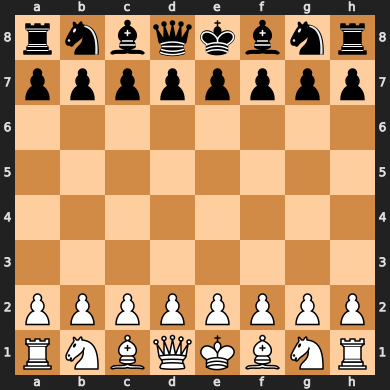

In [30]:
board

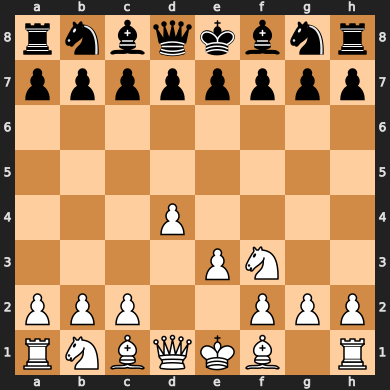

In [31]:
>>> board = chess.Board("rnbqkbnr/pppppppp/8/8/3P4/4PN2/PPP2PPP/RNBQKB1R")
board

In [32]:
move = findBestMove(board, 4, MIN, MAX, True,1)

Time: 1.0320756435394287 s


WHITE Turn
Time: 1.1289794445037842 s
Move in UCI format: f3g1
Time taken by Move: 1.1289794445037842


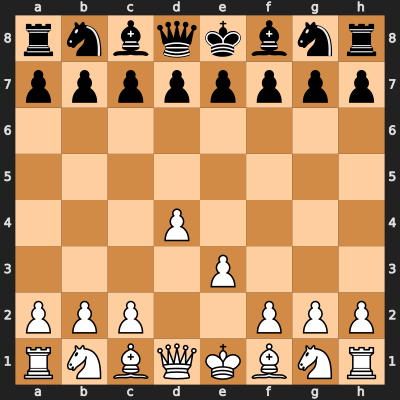



BLACK Turn
Time: 3.527456760406494 s
Move in UCI format: f7f6
Time taken by Move: 3.5280041694641113


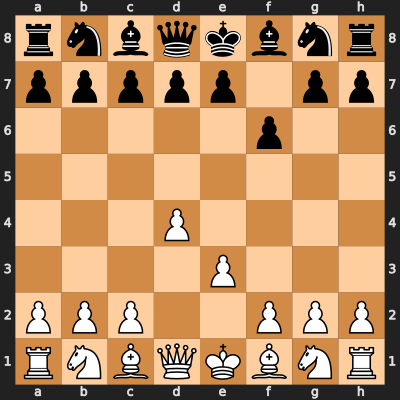



WHITE Turn
Time: 0.600881814956665 s
Move in UCI format: d1h5
Time taken by Move: 0.600881814956665


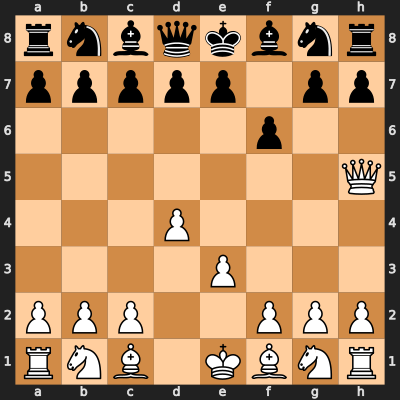



BLACK Turn
Time: 0.21196818351745605 s
Move in UCI format: g7g6
Time taken by Move: 0.21196818351745605


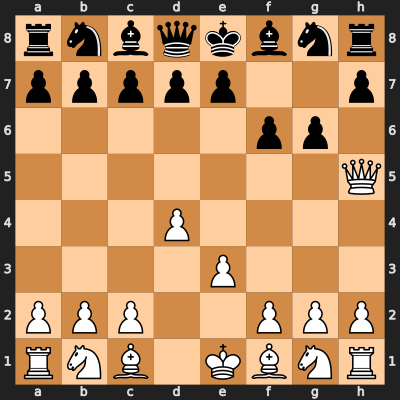



WHITE Turn
Time: 0.5709962844848633 s
Move in UCI format: h5g6
Time taken by Move: 0.5709962844848633


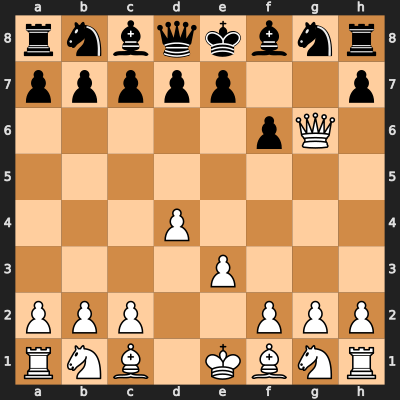



BLACK Turn
Time: 0.33684396743774414 s
Move in UCI format: h7g6
Time taken by Move: 0.33684396743774414


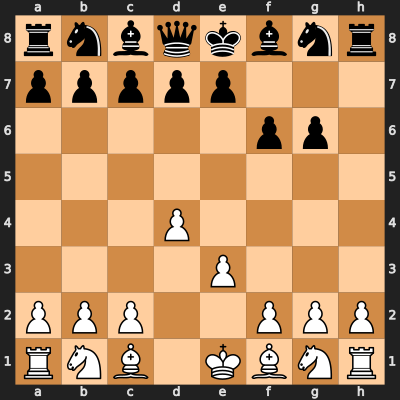



WHITE Turn
Time: 1.525921106338501 s
Move in UCI format: f2f3
Time taken by Move: 1.526885747909546


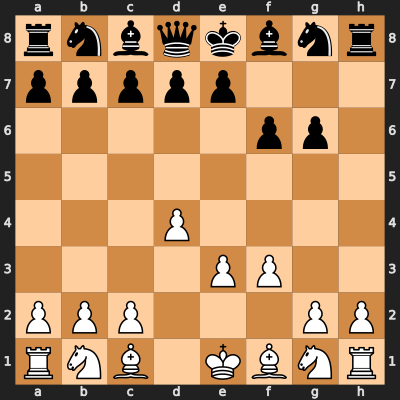



BLACK Turn
Time: 3.337857246398926 s
Move in UCI format: c7c6
Time taken by Move: 3.337857246398926


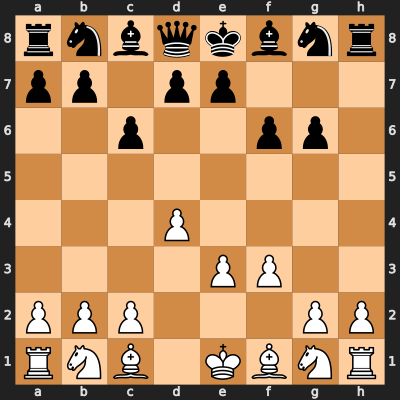



WHITE Turn
Time: 0.9669370651245117 s
Move in UCI format: g2g3
Time taken by Move: 0.9669370651245117


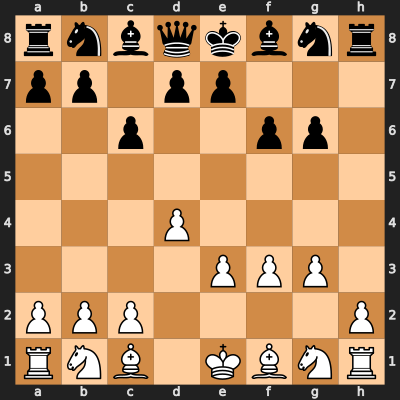



BLACK Turn
Time: 3.0189597606658936 s
Move in UCI format: h8h7
Time taken by Move: 3.0189597606658936


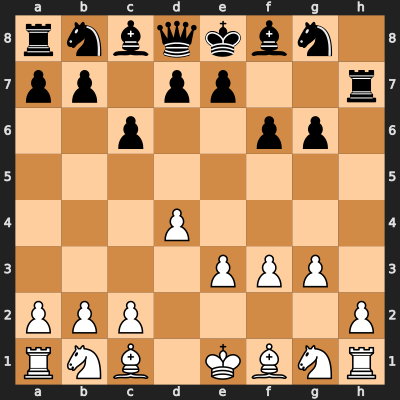



WHITE Turn
Time: 1.7490687370300293 s
Move in UCI format: c2c3
Time taken by Move: 1.7490687370300293


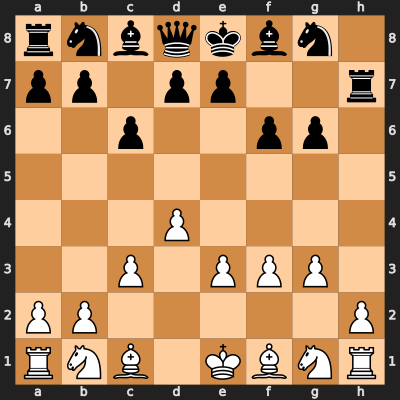



BLACK Turn
Time: 1.6807525157928467 s
Move in UCI format: f8h6
Time taken by Move: 1.6807525157928467


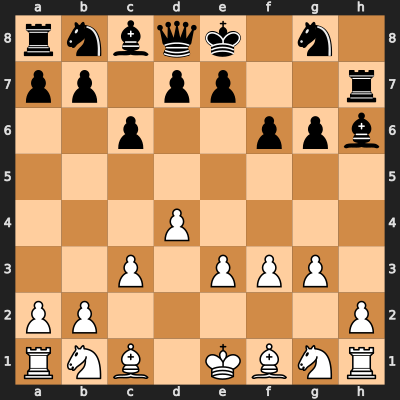



WHITE Turn
Time: 1.2677688598632812 s
Move in UCI format: f1h3
Time taken by Move: 1.2677688598632812


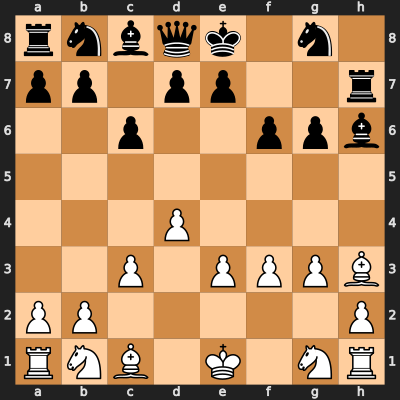



BLACK Turn
Time: 1.7190990447998047 s
Move in UCI format: b7b6
Time taken by Move: 1.7190990447998047


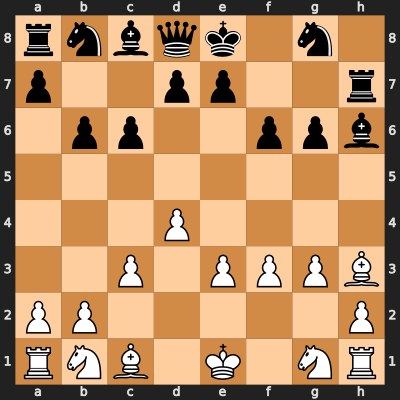



WHITE Turn
Time: 0.6970381736755371 s
Move in UCI format: b2b3
Time taken by Move: 0.6970381736755371


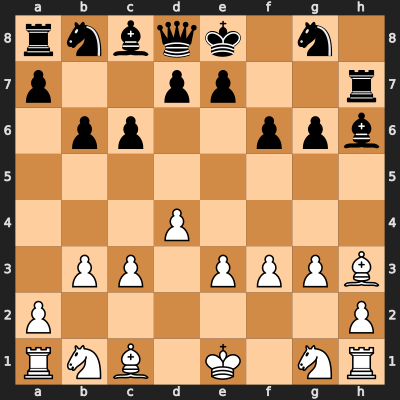



BLACK Turn
Time: 0.9809927940368652 s
Move in UCI format: c8a6
Time taken by Move: 0.9809927940368652


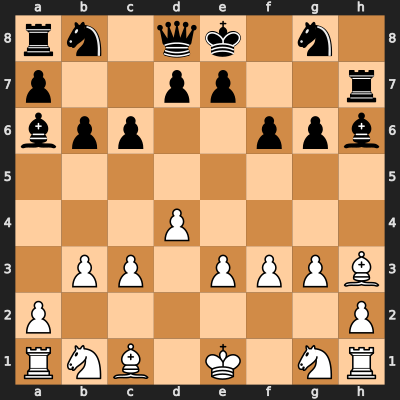



WHITE Turn
Time: 0.4253513813018799 s
Move in UCI format: a2a4
Time taken by Move: 0.4253513813018799


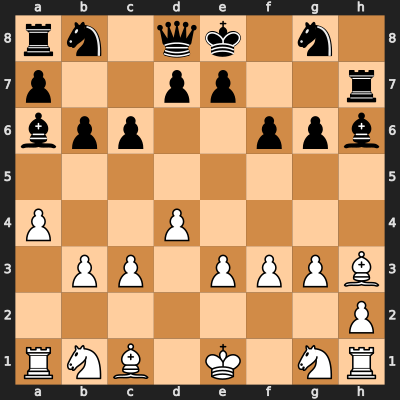



BLACK Turn
Time: 1.2446727752685547 s
Move in UCI format: e8f7
Time taken by Move: 1.2456698417663574


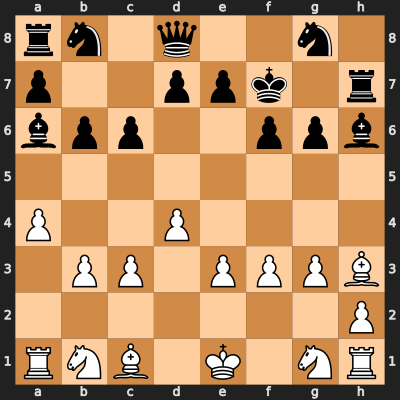



WHITE Turn
Time: 0.7422962188720703 s
Move in UCI format: c1a3
Time taken by Move: 0.7422962188720703


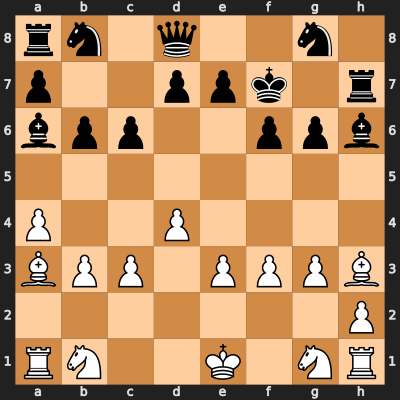



BLACK Turn
Time: 0.7173583507537842 s
Move in UCI format: g6g5
Time taken by Move: 0.7173583507537842


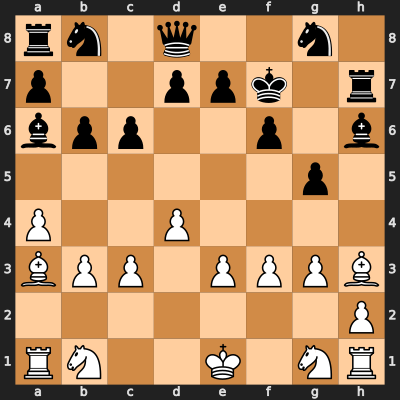



WHITE Turn
Time: 0.3283345699310303 s
Move in UCI format: h3f5
Time taken by Move: 0.3283345699310303


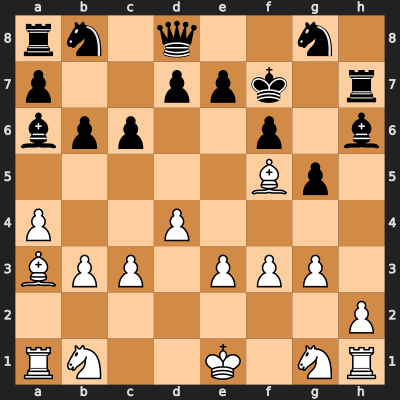



BLACK Turn
Time: 1.042248010635376 s
Move in UCI format: d8f8
Time taken by Move: 1.042248010635376


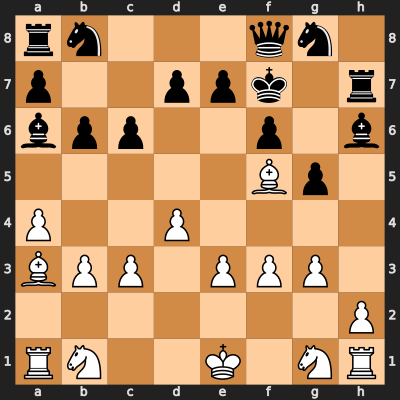



WHITE Turn
Time: 0.5641064643859863 s
Move in UCI format: a1a2
Time taken by Move: 0.5641064643859863


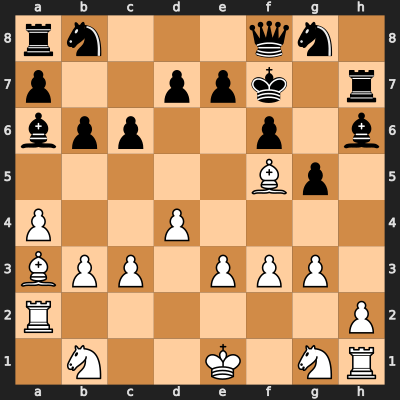



BLACK Turn
Time: 2.0817837715148926 s
Move in UCI format: f8c8
Time taken by Move: 2.0817837715148926


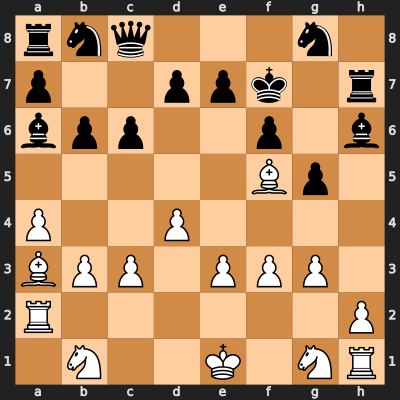



WHITE Turn
Time: 0.7353498935699463 s
Move in UCI format: d4d5
Time taken by Move: 0.7353498935699463


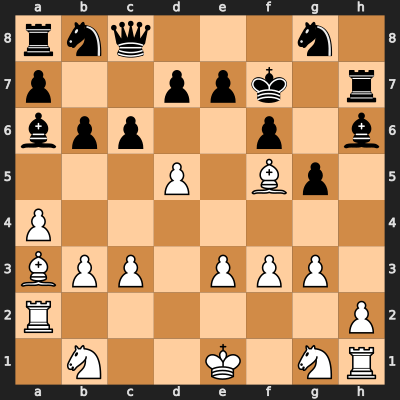



BLACK Turn
Time: 1.421219825744629 s
Move in UCI format: f7e8
Time taken by Move: 1.421219825744629


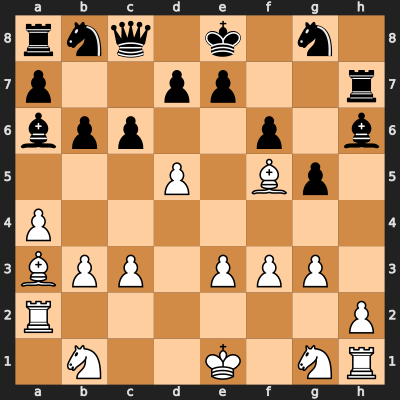



WHITE Turn
Time: 0.6092202663421631 s
Move in UCI format: f5g4
Time taken by Move: 0.6092202663421631


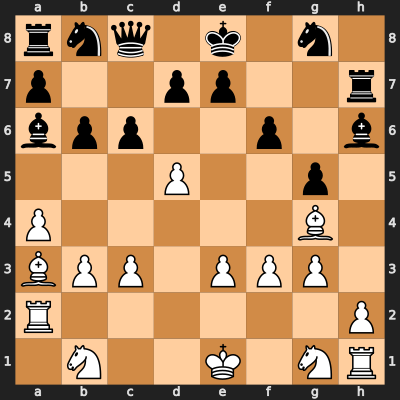



BLACK Turn
Time: 0.7021152973175049 s
Move in UCI format: e8d8
Time taken by Move: 0.7021152973175049


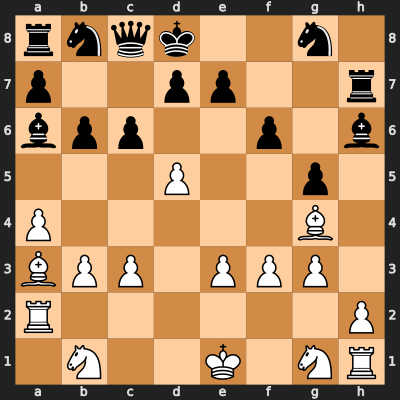



WHITE Turn
Time: 0.9450705051422119 s
Move in UCI format: h2h4
Time taken by Move: 0.9450705051422119


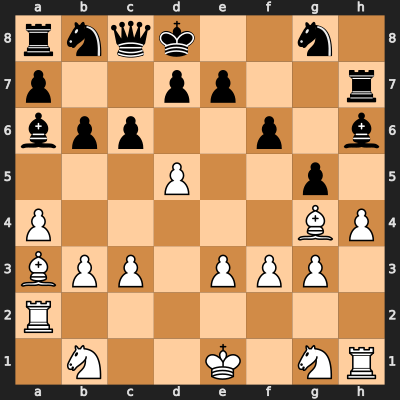



BLACK Turn
Time: 0.9844503402709961 s
Move in UCI format: h6g7
Time taken by Move: 0.9844503402709961


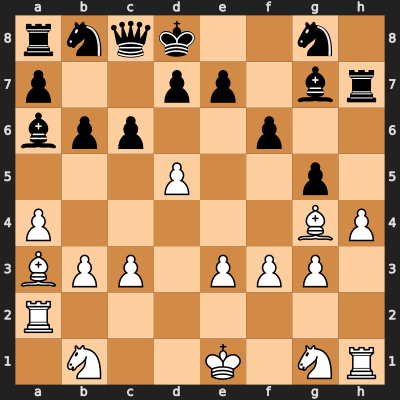



WHITE Turn
Time: 1.4095938205718994 s
Move in UCI format: g4h3
Time taken by Move: 1.4095938205718994


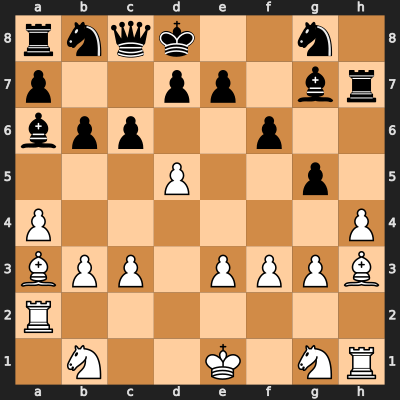



BLACK Turn
Time: 1.3604435920715332 s
Move in UCI format: d8e8
Time taken by Move: 1.3604435920715332


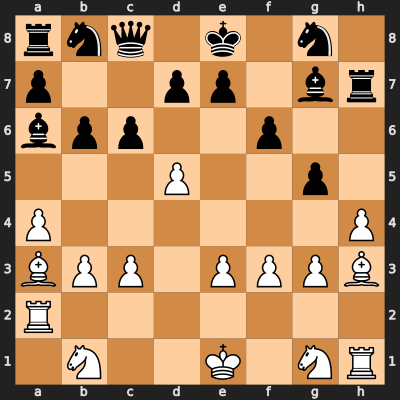



WHITE Turn
Time: 1.894249439239502 s
Move in UCI format: a3b2
Time taken by Move: 1.894249439239502


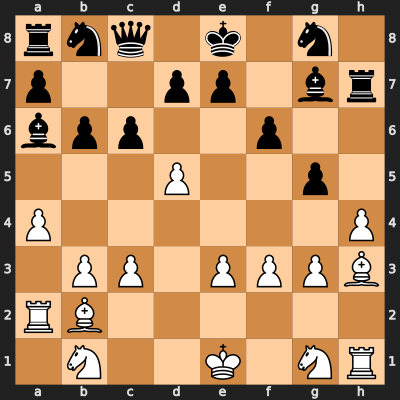



BLACK Turn
Time: 2.215235948562622 s
Move in UCI format: e8d8
Time taken by Move: 2.216233015060425


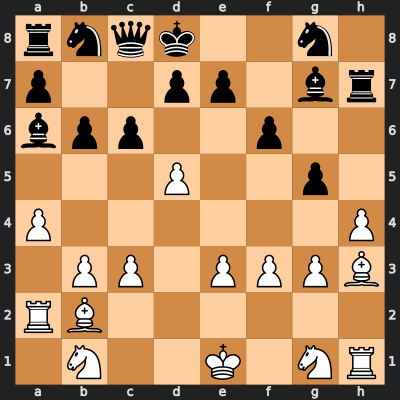



WHITE Turn
Time: 1.8918952941894531 s
Move in UCI format: b2a1
Time taken by Move: 1.8928985595703125


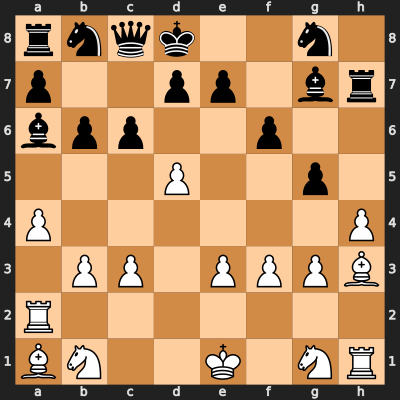



BLACK Turn
Time: 1.6003162860870361 s
Move in UCI format: d8e8
Time taken by Move: 1.601302146911621


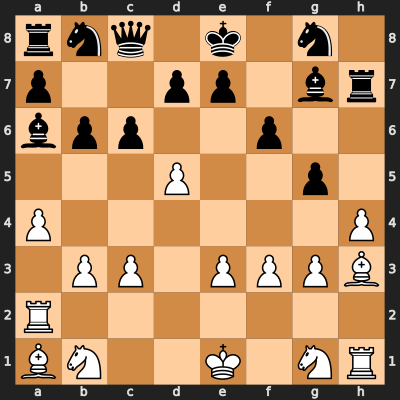



WHITE Turn
Time: 1.7694206237792969 s
Move in UCI format: a2a3
Time taken by Move: 1.7694206237792969


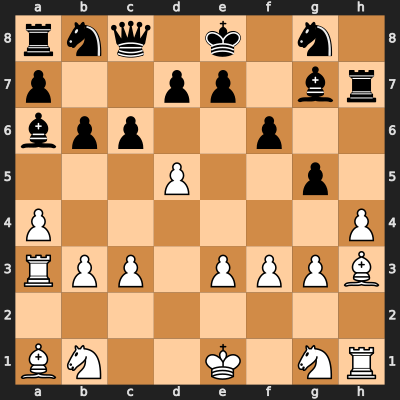



BLACK Turn
Time: 0.9424474239349365 s
Move in UCI format: e8d8
Time taken by Move: 0.9424474239349365


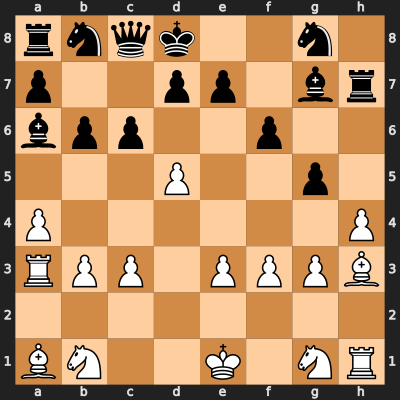



WHITE Turn
Time: 1.2376492023468018 s
Move in UCI format: a3a2
Time taken by Move: 1.2376492023468018


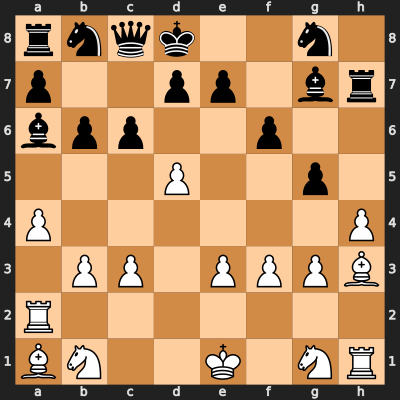



BLACK Turn
Time: 1.1359660625457764 s
Move in UCI format: d8e8
Time taken by Move: 1.1369619369506836


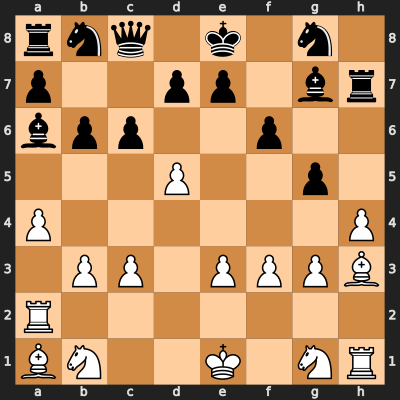



WHITE Turn
Time: 1.431208848953247 s
Move in UCI format: a2a3
Time taken by Move: 1.431208848953247


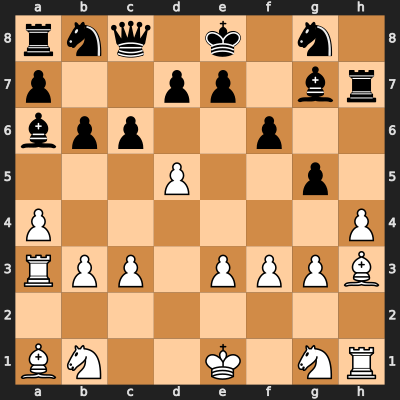



BLACK Turn
Time: 0.9459528923034668 s
Move in UCI format: e8d8
Time taken by Move: 0.9459528923034668


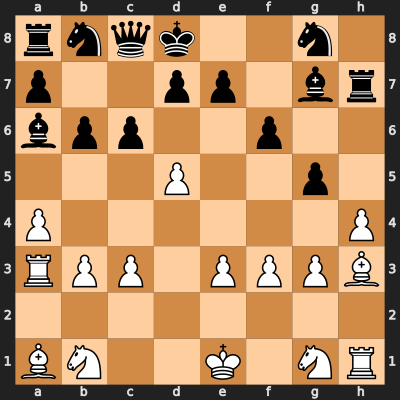



WHITE Turn
Time: 1.1884665489196777 s
Move in UCI format: a3a2
Time taken by Move: 1.1884665489196777


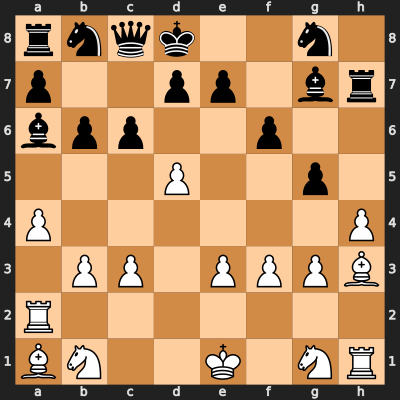



BLACK Turn
Time: 1.1981449127197266 s
Move in UCI format: d8e8
Time taken by Move: 1.19911527633667


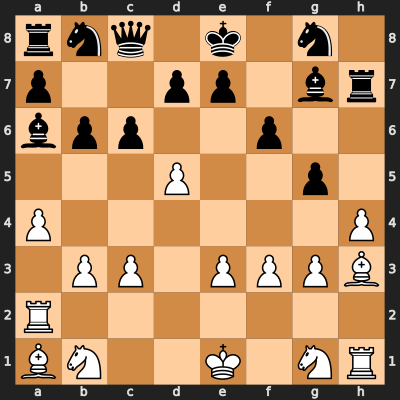



WHITE Turn
Time: 1.4471073150634766 s
Move in UCI format: a2a3
Time taken by Move: 1.4471073150634766


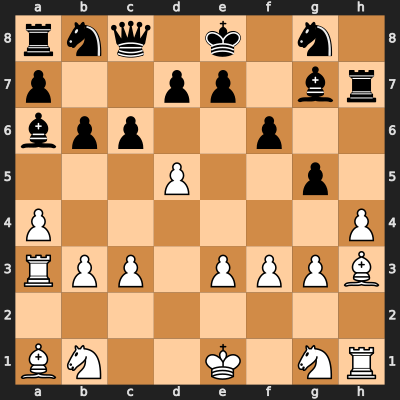



BLACK Turn
Time: 0.8908658027648926 s
Move in UCI format: e8d8
Time taken by Move: 0.8908658027648926


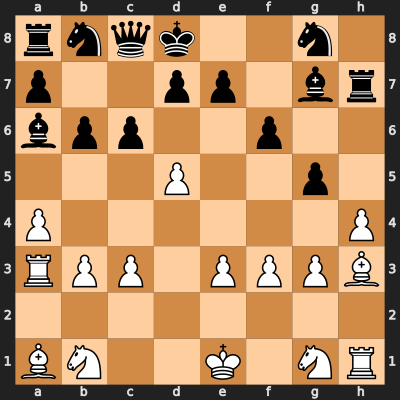



WHITE Turn
Time: 1.1428325176239014 s
Move in UCI format: a3a2
Time taken by Move: 1.1428325176239014


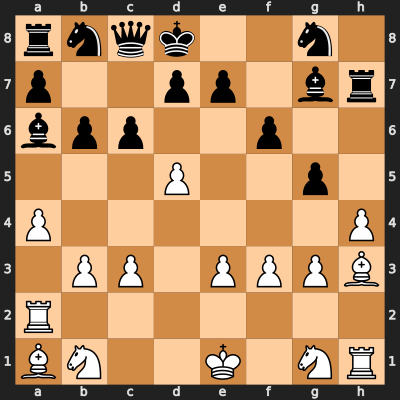



BLACK Turn
Time: 1.2083053588867188 s
Move in UCI format: d8e8
Time taken by Move: 1.2083053588867188


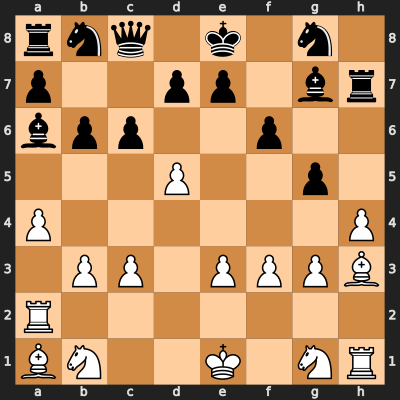



WHITE Turn
Time: 1.5607099533081055 s
Move in UCI format: a2a3
Time taken by Move: 1.5607099533081055


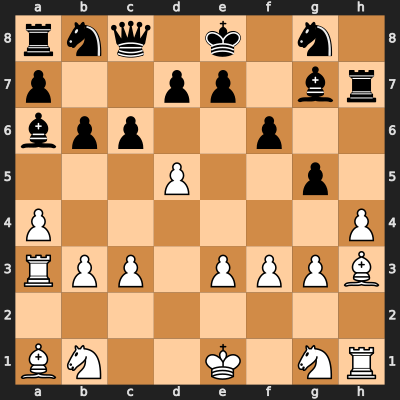



BLACK Turn
Time: 0.9369471073150635 s
Move in UCI format: e8d8
Time taken by Move: 0.9379391670227051


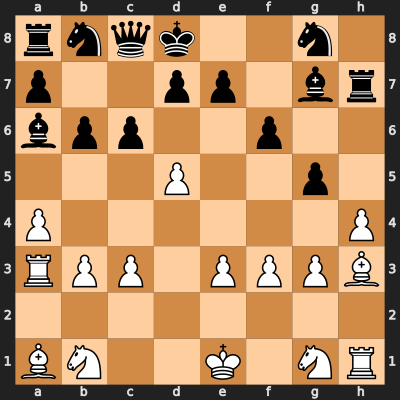



WHITE Turn
Time: 1.1301147937774658 s
Move in UCI format: a3a2
Time taken by Move: 1.1301147937774658


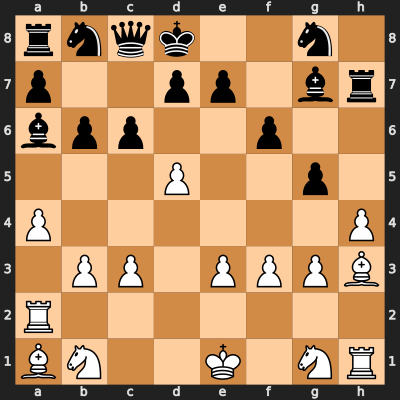



BLACK Turn
Time: 1.1336338520050049 s
Move in UCI format: d8e8
Time taken by Move: 1.1336338520050049


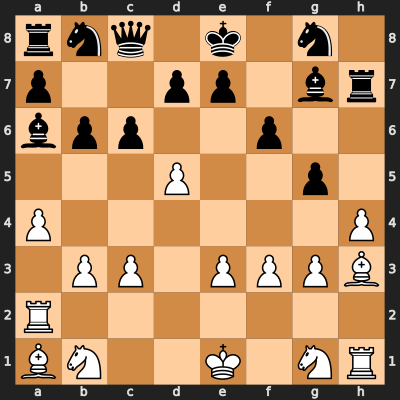



WHITE Turn
Time: 1.3883717060089111 s
Move in UCI format: a2a3
Time taken by Move: 1.3883717060089111


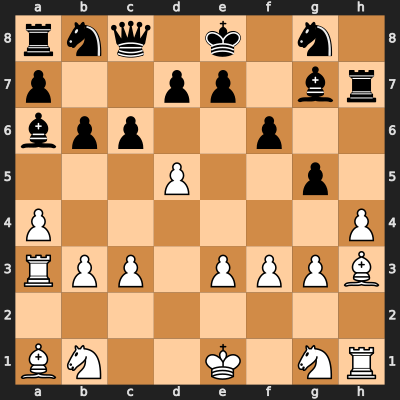



BLACK Turn
Time: 0.8822903633117676 s
Move in UCI format: e8d8
Time taken by Move: 0.8832945823669434


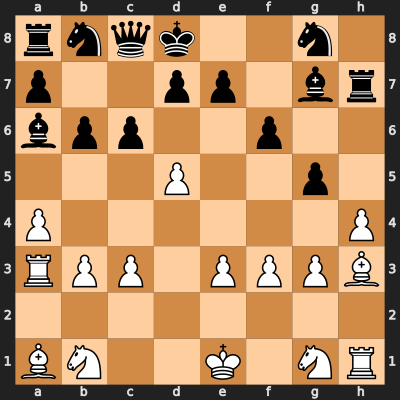



WHITE Turn
Time: 1.4141724109649658 s
Move in UCI format: a3a2
Time taken by Move: 1.4141724109649658


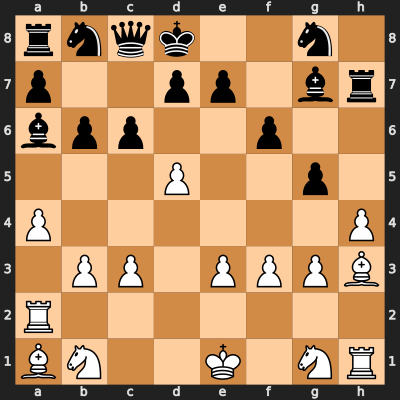



BLACK Turn
Time: 1.1039230823516846 s
Move in UCI format: d8e8
Time taken by Move: 1.1039230823516846


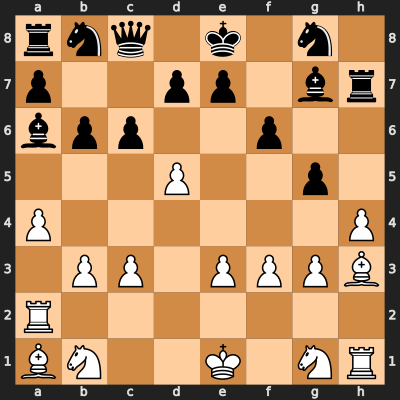



WHITE Turn
Time: 1.3791193962097168 s
Move in UCI format: a2a3
Time taken by Move: 1.3791193962097168


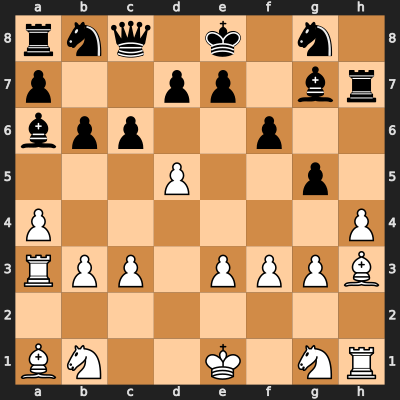



BLACK Turn
Time: 0.9031703472137451 s
Move in UCI format: e8d8
Time taken by Move: 0.9031703472137451


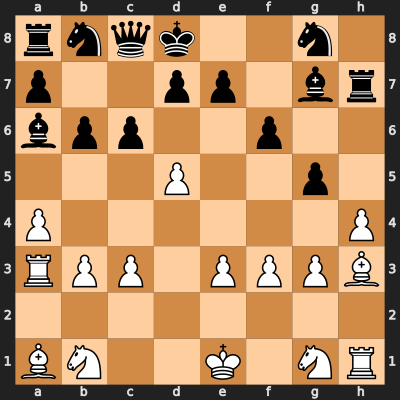



WHITE Turn
Time: 1.1325743198394775 s
Move in UCI format: a3a2
Time taken by Move: 1.1325743198394775


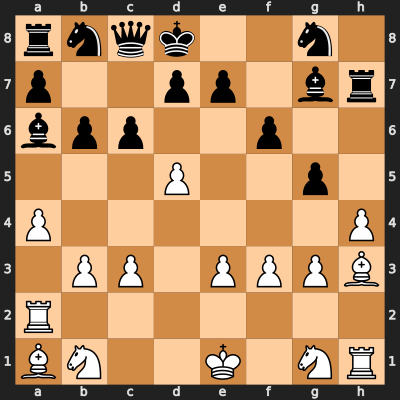



BLACK Turn
Time: 1.1614134311676025 s
Move in UCI format: d8e8
Time taken by Move: 1.1624104976654053


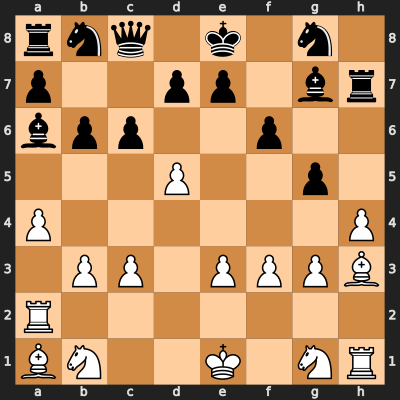



WHITE Turn
Time: 1.472099781036377 s
Move in UCI format: a2a3
Time taken by Move: 1.472099781036377


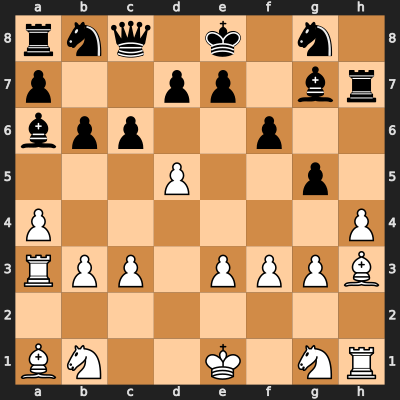



BLACK Turn
Time: 0.8986310958862305 s
Move in UCI format: e8d8
Time taken by Move: 0.8986310958862305


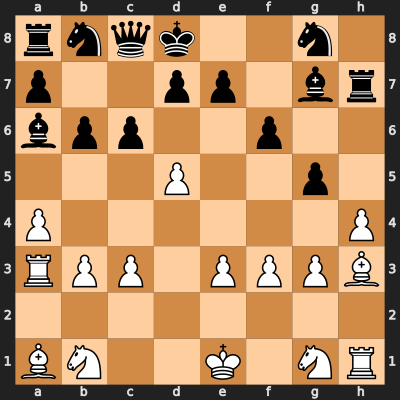



WHITE Turn
Time: 1.131866455078125 s
Move in UCI format: a3a2
Time taken by Move: 1.131866455078125


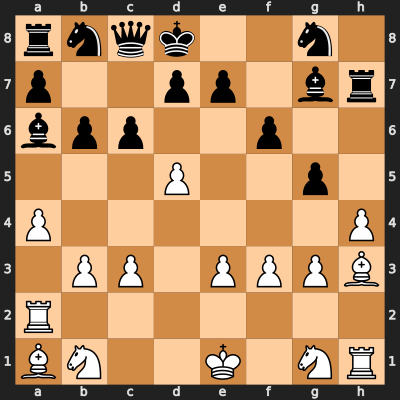



BLACK Turn
Time: 1.1674950122833252 s
Move in UCI format: d8e8
Time taken by Move: 1.1674950122833252


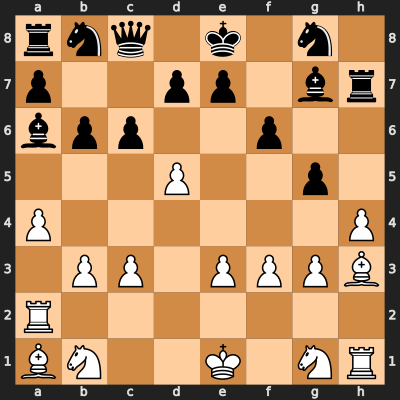



WHITE Turn
Time: 1.4546058177947998 s
Move in UCI format: a2a3
Time taken by Move: 1.4546058177947998


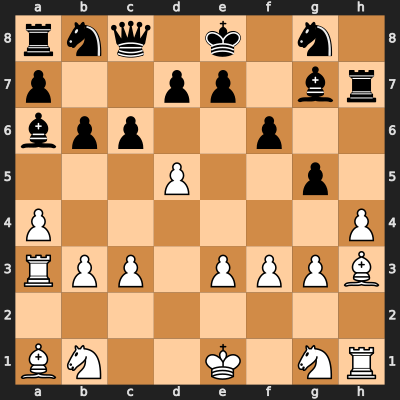



BLACK Turn
Time: 0.8956401348114014 s
Move in UCI format: e8d8
Time taken by Move: 0.8956401348114014


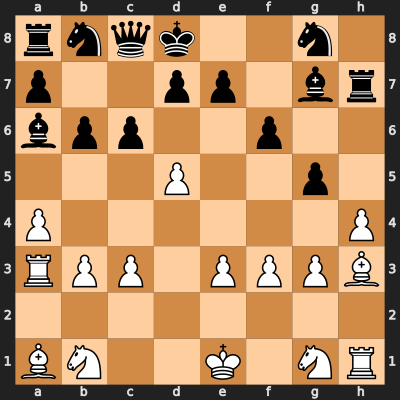



WHITE Turn
Time: 1.1658804416656494 s
Move in UCI format: a3a2
Time taken by Move: 1.1658804416656494


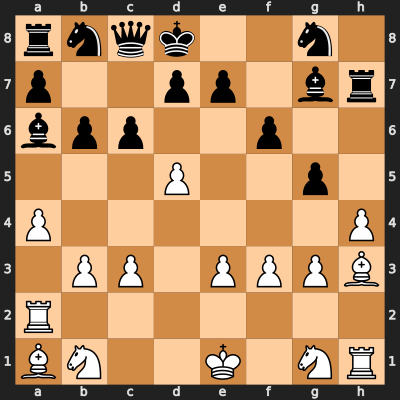



BLACK Turn
Time: 1.1360177993774414 s
Move in UCI format: d8e8
Time taken by Move: 1.1360177993774414


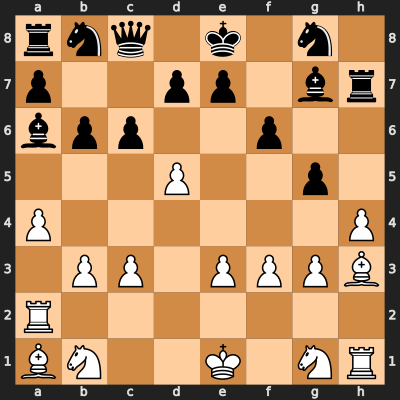



WHITE Turn
Time: 1.398146152496338 s
Move in UCI format: a2a3
Time taken by Move: 1.398146152496338


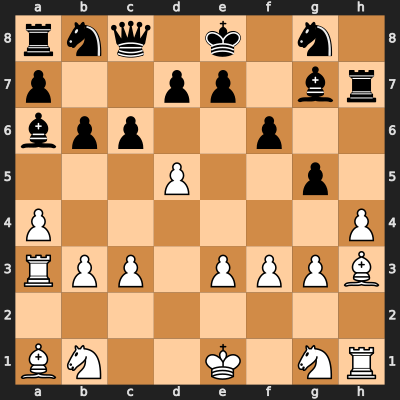



BLACK Turn
Time: 1.0230493545532227 s
Move in UCI format: e8d8
Time taken by Move: 1.0230493545532227


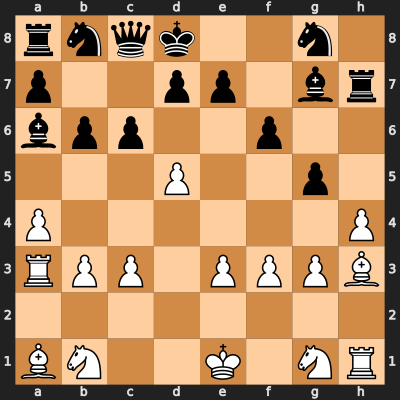



WHITE Turn
Time: 1.1579041481018066 s
Move in UCI format: a3a2
Time taken by Move: 1.1579041481018066


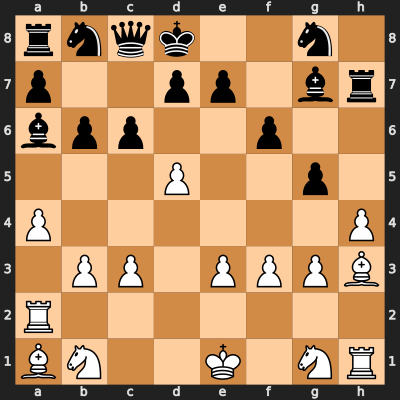



BLACK Turn
Time: 1.1561572551727295 s
Move in UCI format: d8e8
Time taken by Move: 1.1561572551727295


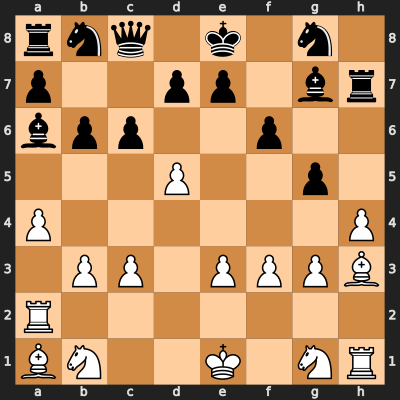



WHITE Turn
Time: 1.4369971752166748 s
Move in UCI format: a2a3
Time taken by Move: 1.4369971752166748


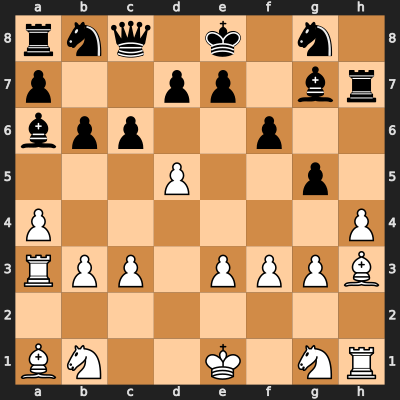



BLACK Turn
Time: 0.9030599594116211 s
Move in UCI format: e8d8
Time taken by Move: 0.9030599594116211


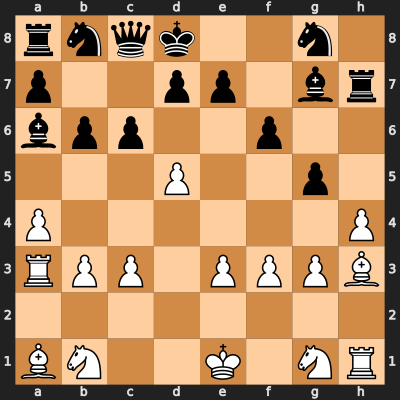



WHITE Turn
Time: 1.1835901737213135 s
Move in UCI format: a3a2
Time taken by Move: 1.1835901737213135


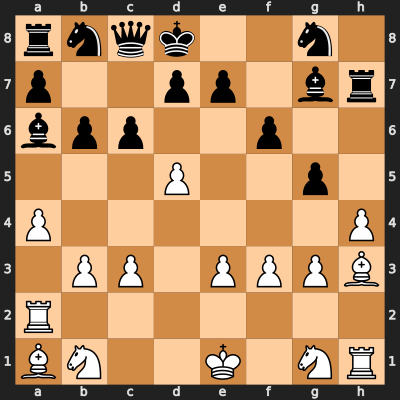



BLACK Turn
Time: 1.1496286392211914 s
Move in UCI format: d8e8
Time taken by Move: 1.1506259441375732


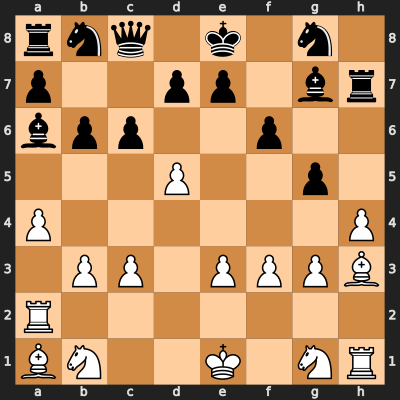



WHITE Turn
Time: 1.659986972808838 s
Move in UCI format: a2a3
Time taken by Move: 1.659986972808838


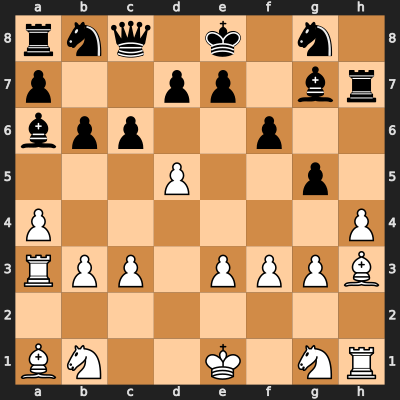



BLACK Turn
Time: 0.8964521884918213 s
Move in UCI format: e8d8
Time taken by Move: 0.8964521884918213


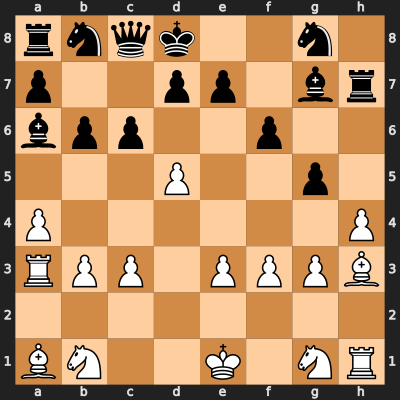



WHITE Turn
Time: 1.1358146667480469 s
Move in UCI format: a3a2
Time taken by Move: 1.1358146667480469


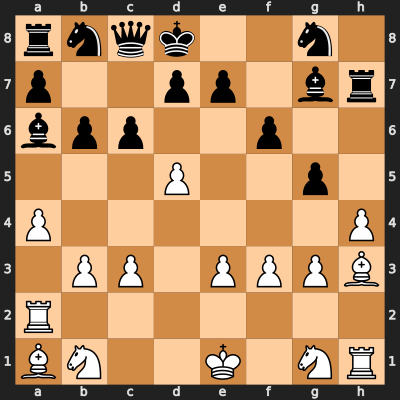



BLACK Turn
Time: 1.2038695812225342 s
Move in UCI format: d8e8
Time taken by Move: 1.2038695812225342


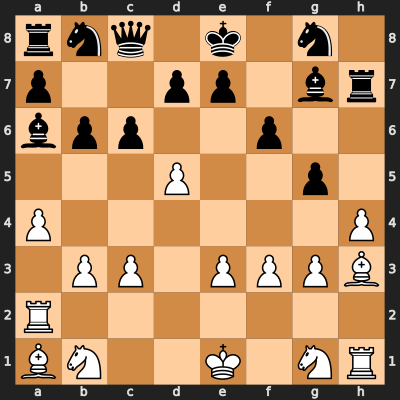



WHITE Turn
Time: 1.4119246006011963 s
Move in UCI format: a2a3
Time taken by Move: 1.4119246006011963


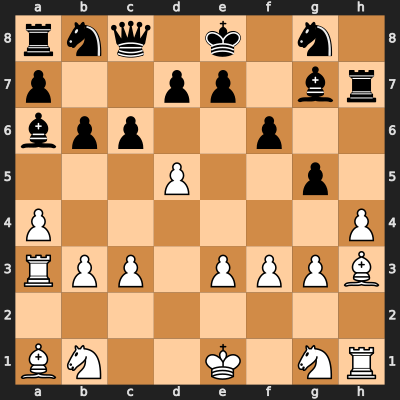



BLACK Turn
Time: 0.9027421474456787 s
Move in UCI format: e8d8
Time taken by Move: 0.9027421474456787


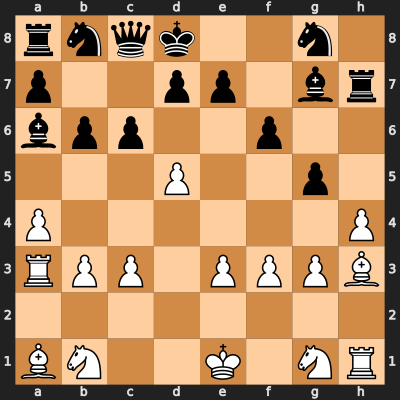



WHITE Turn
Time: 1.1394665241241455 s
Move in UCI format: a3a2
Time taken by Move: 1.1394665241241455


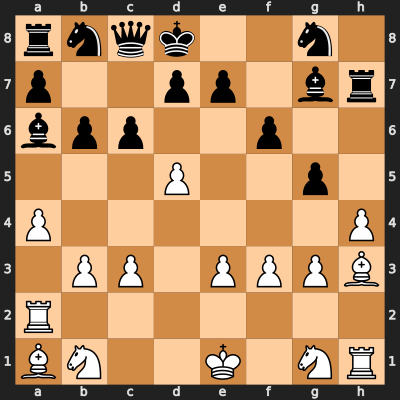



BLACK Turn
Time: 1.1158134937286377 s
Move in UCI format: d8e8
Time taken by Move: 1.1158134937286377


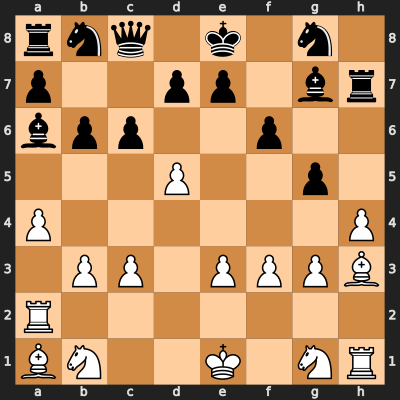



WHITE Turn
Time: 1.4429926872253418 s
Move in UCI format: a2a3
Time taken by Move: 1.4429926872253418


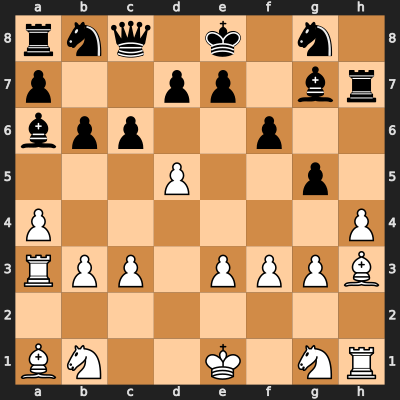



BLACK Turn
Time: 0.9259786605834961 s
Move in UCI format: e8d8
Time taken by Move: 0.9259786605834961


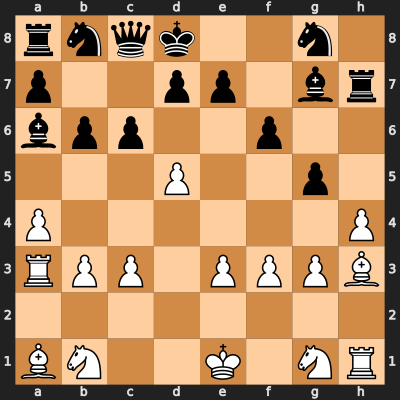



WHITE Turn
Time: 1.1590452194213867 s
Move in UCI format: a3a2
Time taken by Move: 1.1590452194213867


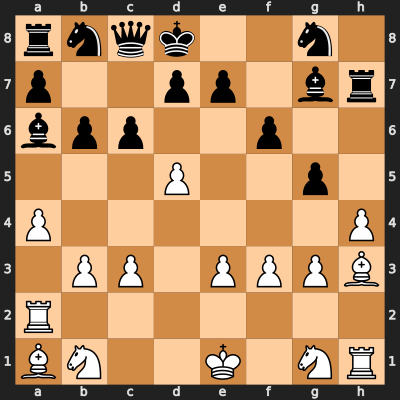



BLACK Turn
Time: 1.136359453201294 s
Move in UCI format: d8e8
Time taken by Move: 1.136359453201294


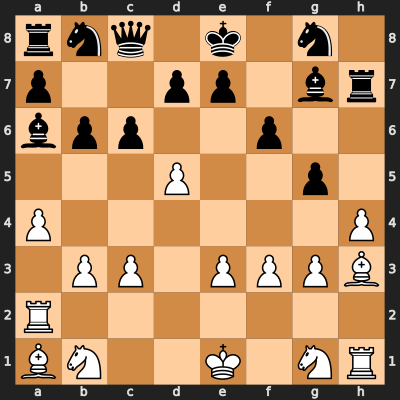



WHITE Turn
Time: 1.5352673530578613 s
Move in UCI format: a2a3
Time taken by Move: 1.5352673530578613


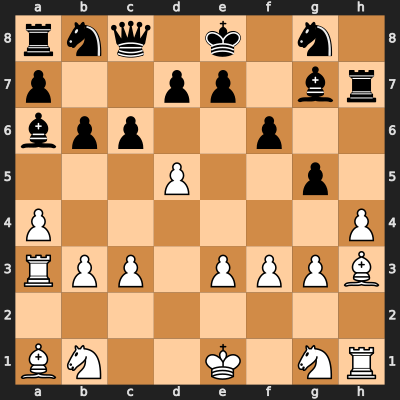



BLACK Turn
Time: 0.9205853939056396 s
Move in UCI format: e8d8
Time taken by Move: 0.9205853939056396


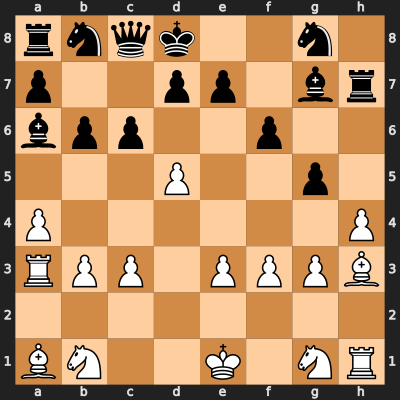



WHITE Turn
Time: 1.13999605178833 s
Move in UCI format: a3a2
Time taken by Move: 1.13999605178833


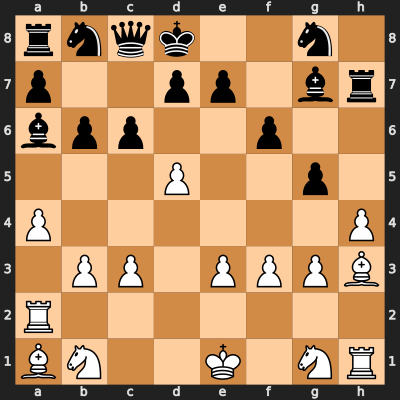



BLACK Turn
Time: 1.1652672290802002 s
Move in UCI format: d8e8
Time taken by Move: 1.1652672290802002


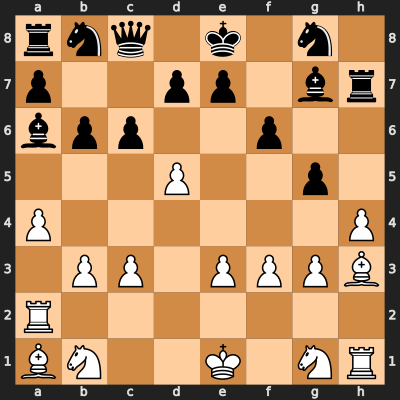



WHITE Turn
Time: 1.3896725177764893 s
Move in UCI format: a2a3
Time taken by Move: 1.3896725177764893


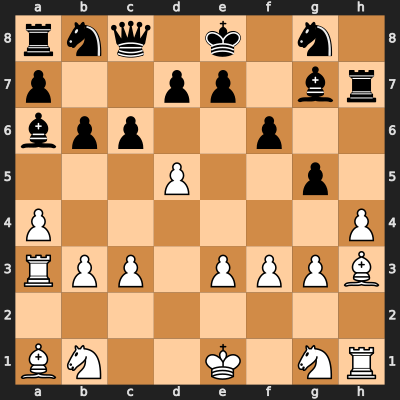



BLACK Turn
Time: 0.9078884124755859 s
Move in UCI format: e8d8
Time taken by Move: 0.9078884124755859


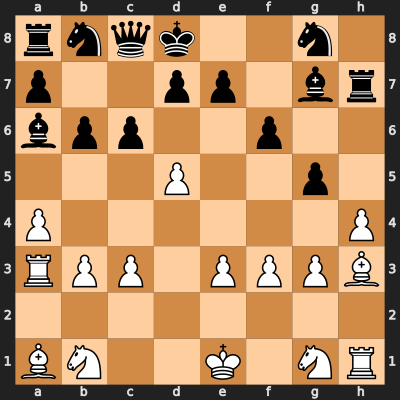



WHITE Turn
Time: 1.1457493305206299 s
Move in UCI format: a3a2
Time taken by Move: 1.1457493305206299


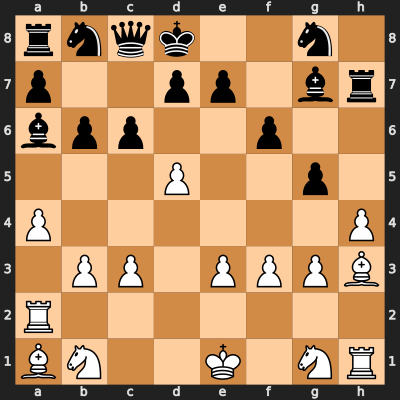



BLACK Turn
Time: 1.1428887844085693 s
Move in UCI format: d8e8
Time taken by Move: 1.1428887844085693


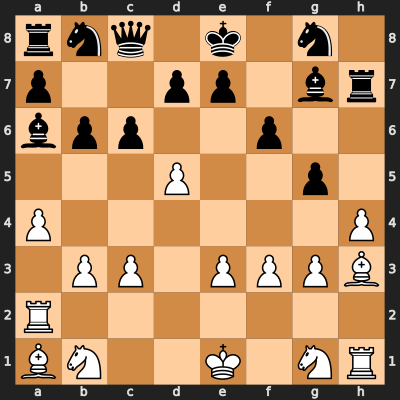



WHITE Turn
Time: 1.4289867877960205 s
Move in UCI format: a2a3
Time taken by Move: 1.4289867877960205


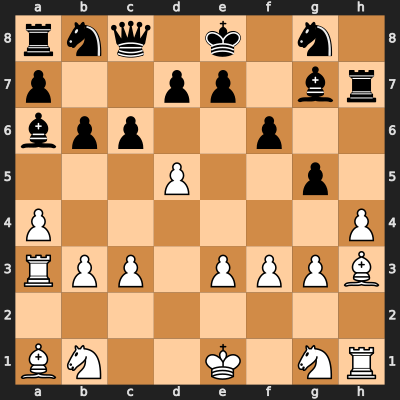



BLACK Turn
Time: 0.9145863056182861 s
Move in UCI format: e8d8
Time taken by Move: 0.9145863056182861


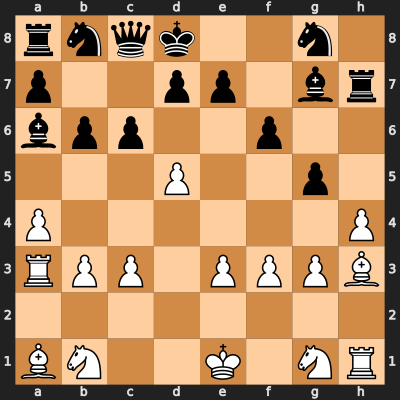



WHITE Turn
Time: 1.160905361175537 s
Move in UCI format: a3a2
Time taken by Move: 1.160905361175537


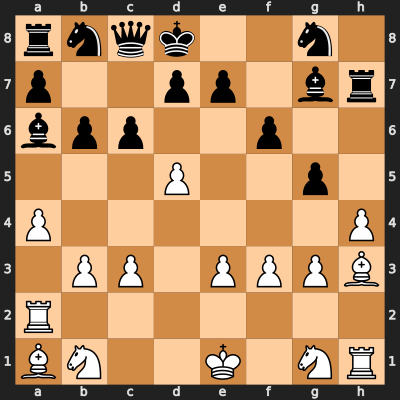



BLACK Turn
Time: 1.1325738430023193 s
Move in UCI format: d8e8
Time taken by Move: 1.1325738430023193


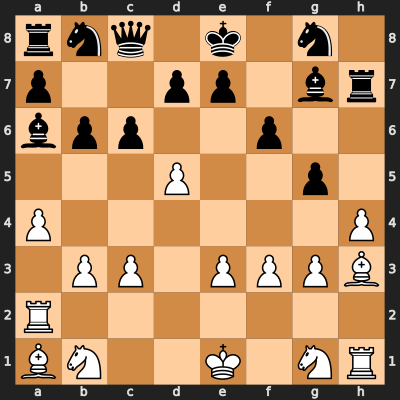

In [33]:
game_between_two_computer(4)